# CipherByte Internship Project

## Intern - Prashant Mishra

## Domain - Data Science

### Task - 4

## Email Spam Detection with machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Spam.csv', encoding='latin-1')

In [3]:
df.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.size

27860

# Data Cleaning

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5163,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
#DROP Last three column(Unnamed: 2, Unnamed: 3, Unnamed: 4)because these columns contain 50, 12, 5 non-null out of 5572
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [9]:
df.sample(4)

,v1,v2
3542,ham,I'm e person who's doing e sms survey...
573,ham,Waiting for your call.
5306,ham,Ill be at yours in about 3 mins but look out f...
1441,ham,Ya:)going for restaurant..


In [10]:
#renaming the cols

df.rename(columns={'v1':'Target','v2':'Text'}, inplace = True)

In [11]:
df.sample(4)

,Target,Text
3775,ham,Ok lor. Msg me b4 u call.
638,ham,"What will we do in the shower, baby?"
557,ham,I know that my friend already told that.
2407,ham,Solve d Case : A Man Was Found Murdered On &l...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['Target'] = encoder.fit_transform(df['Target'])

In [14]:
df.head(4)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [15]:
#Checking missing values

df.isnull().sum()

Target    0
Text      0
dtype: int64

In [16]:
#checking duplicates values

df.duplicated().sum()

409

In [17]:
df = df.drop_duplicates(keep= 'first')

In [18]:
df.duplicated().sum()


0

In [19]:
df.shape

(5163, 2)

# EDA

In [20]:
df.head(8)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...


In [21]:
df['Target'].value_counts()

Target
0    4516
1     647
Name: count, dtype: int64

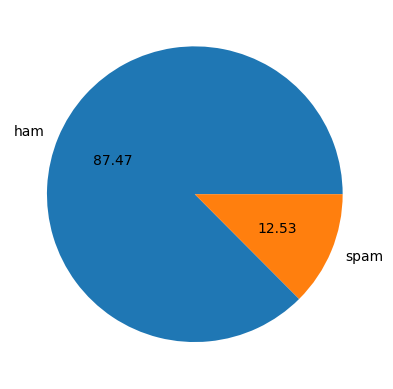

In [22]:
import matplotlib.pyplot as plt

plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()


Now we will see or do analysis on how many alphabet, words & sentences are used in sms/message/Email and next for deeper analysis I will create three 
Cols:col 1) no. of charecter in the sms/email 
         2) no. of sentences in the sms/mail for this work i have to import nltk

In [23]:
import nltk

In [24]:
# NLTK(Natural Language Tool Kit) is a popular Library for working with hunman Language data in Python. I Provides a wide range 
#                                 of tools and resources for task such as tokenization, stemming, Lematization, part-of-speech
#                                 tagging, parsing, seamantic reasoning and more.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
# see how to col. no. of charecter in sms/email

df['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    162
5568     39
5569     57
5570    125
5571     26
Name: Text, Length: 5163, dtype: int64

In [26]:
# then i store no. of charecter in new variable/col

df['num_charecters'] = df['Text'].apply(len)

In [27]:
df.head(6)

,Target,Text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,149


In [29]:
# now fetch the no.n of words

df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568    [Will, ï¿½_, b, going, to, esplanade, fr, home...
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5163, dtype: object

now every sms/mail has been breaken into word by word basis and put each spitted word of each sentences into a list

In [30]:
# now I will col. length of each list

df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5163, dtype: int64

this is the ni. of words used in per sms/mail

In [33]:
# store no. of words in new variable/col. num_words

df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [34]:
df.head(6)

,Target,Text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,149,39


In [35]:
# now fetch no. of sentences in single sms/mail

df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568            [Will ï¿½_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5163, dtype: object

Based on sentences basis I am Tokenizing/brek sentence into small sentences and put each sms/mail into a list

In [36]:
# now col. Len of each sentences

df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5163, dtype: int64

In [37]:
# store no. of entences in new variable/col. num_sentences

df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df.head(6)

,Target,Text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,149,39,4


In [39]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,79.117761,18.443153,1.963006
std,58.315931,13.327064,1.446712
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


now analyze ham and spam sms/mail seprately

In [40]:
#ham

df[df['Target'] == 0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.655890,17.123782,1.820195
std,56.434262,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
#Spam

df[df['Target'] == 1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,647.000000,647.000000,647.000000
mean,138.180835,27.652241,2.959815
std,30.343387,7.034937,1.485198
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


<Axes: xlabel='num_charecters', ylabel='Count'>

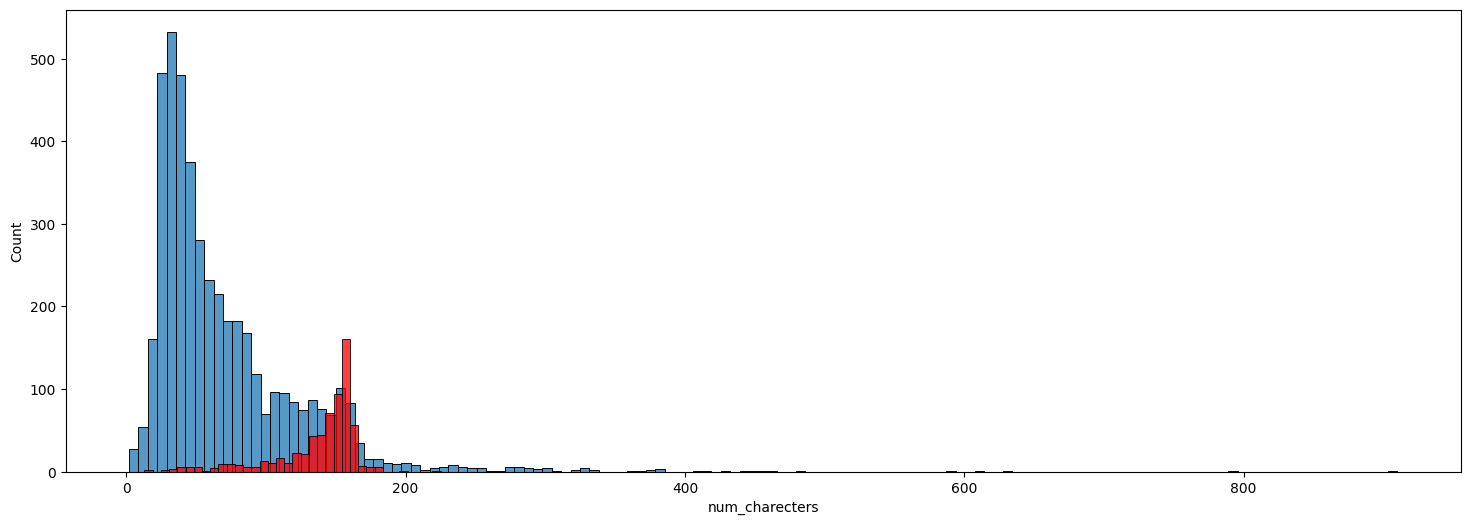

In [42]:
#plot histogram of ham and spam sms/mail

plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_charecters'])
sns.histplot(df[df['Target']==1]['num_charecters'], color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

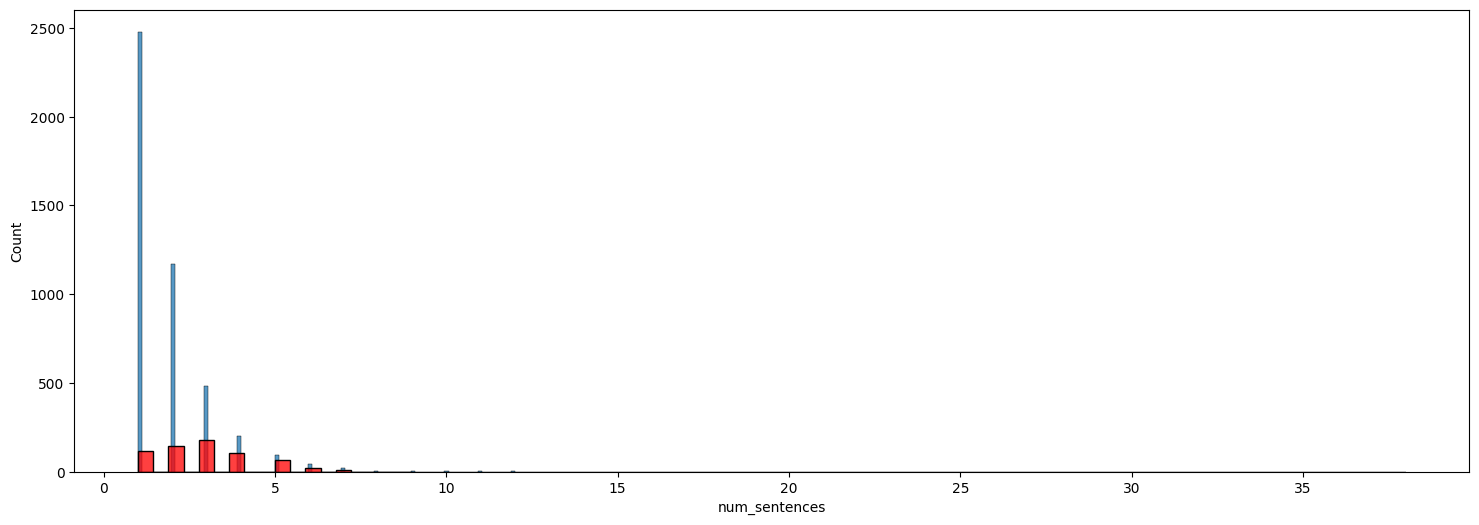

In [43]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'], color = 'red')

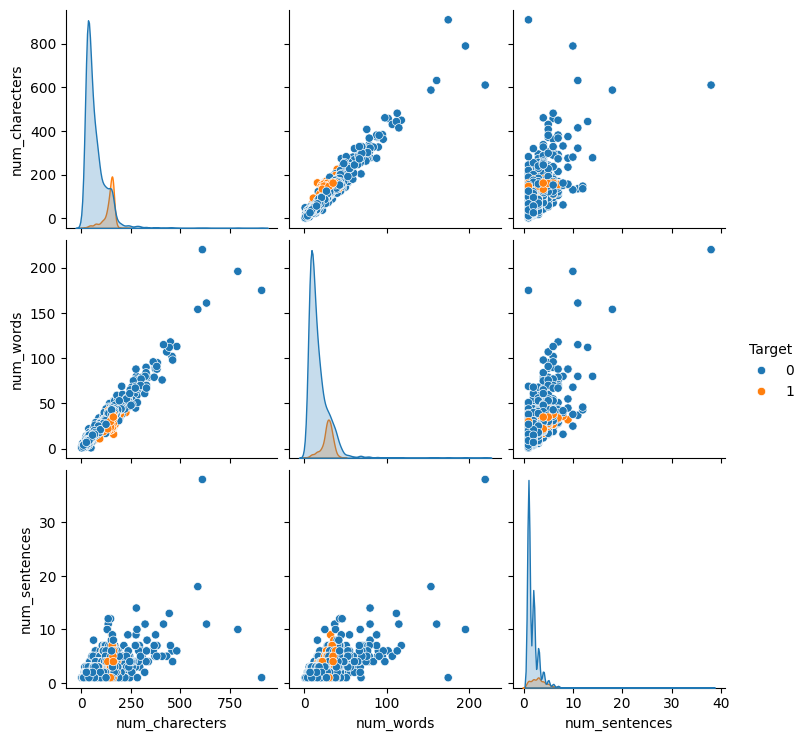

In [44]:
sns.pairplot(df, hue = 'Target')

In [50]:
df.corr(numeric_only=True)

,Target,num_charecters,num_words,num_sentences
Target,1.000000,0.383395,0.261577,0.260824
num_charecters,0.383395,1.000000,0.965369,0.622983
num_words,0.261577,0.965369,1.000000,0.679902
num_sentences,0.260824,0.622983,0.679902,1.000000


<Axes: >

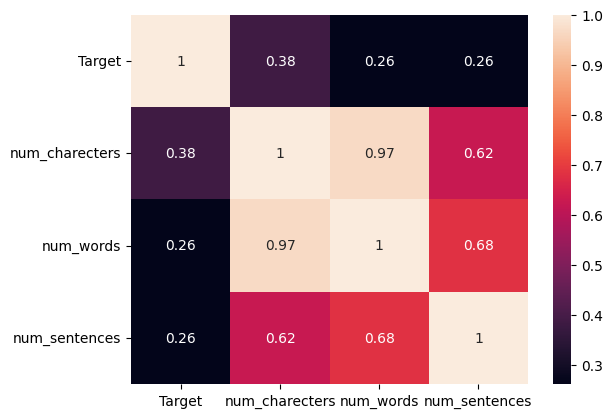

In [53]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data/Text Preprocessing

i) Lower ii)Tokenization iii) Removing special charecter iv) Removing stop words and punctuation v) stemming

In [60]:
# I create a function which perform all the above five steps of text processing
# i) Lower

def transform_text1(text1):
    text1 = text1.lower()
    return text1

In [61]:
transform_text1('HI how Are You')

'hi how are you'

In [64]:
# ii) Tokenization

def transform_text2(text2):
    text2 = nltk.word_tokenize(text2)
    return text2

In [65]:
transform_text2('HI how Are You')

['HI', 'how', 'Are', 'You']

In [67]:
# iii) Removing special Charecter

def transform_text3(text3):
    y=[]
    for i in text3:
        if i.isalnum():
            y.append(i)
    return y        

In [68]:
transform_text3('HI how Are % @ 20 45* You')

['H', 'I', 'h', 'o', 'w', 'A', 'r', 'e', '2', '0', '4', '5', 'Y', 'o', 'u']

In [71]:
def transform_text3a(text3a):
    text3a = text3a.lower()
    text3a = nltk.word_tokenize(text3a)
    y_a=[]
    for i in text3a:
        if i.isalnum():
            y_a.append(i)
    return y_a    

In [72]:
transform_text3a('HI how Are % @ 20 45* You')

['hi', 'how', 'are', '20', '45', 'you']

In [74]:
# iv) Removing stop words and punctuation
# v) stemming

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [75]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
def transform_text4(text4):
    text4 = text4.lower()
    text4 = nltk.word_tokenize(text4)
    y_4=[]
    for i in text4:
        if i.isalnum():
            y_4.append(i)
    text4 = y_4[:] 
    y_4.clear()
    for i in text4:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y_4.append(i)
    return y_4        

In [79]:
transform_text4('HI how Are % @ 20 45* You Mrinal?')

['hi', '20', '45', 'mrinal']

In [84]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

def transform_text5(text5):
    text5 = text5.lower()
    text5 = nltk.word_tokenize(text5)
    y_5 = []
    for i in text5:
        if i.isalnum():
            y_5.append(i)
    text5 = y_5[:] 
    y_5.clear()
    for i in text5:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y_5.append(i)
    text = y_5[:] 
    y_5.clear()  
    ps = PorterStemmer()
    for i in text5:
        y_5.append(ps.stem(i))
    return " ".join(y_5)


In [85]:
transform_text5('I loved the YT lectures of Machine Laerning. How about you?')

'i love the yt lectur of machin laern how about you'

In [86]:
df['Text'][200]

'I sent you  &lt;#&gt;  bucks'

In [87]:
transform_text5('I sent you  &lt;#&gt;  bucks')

'i sent you lt gt buck'

In [88]:
df['Text'][2000]


"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [90]:
transform_text5("But i'll b going 2 sch on mon. My sis need 2 take smth.")

'but i b go 2 sch on mon my si need 2 take smth'

In [91]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    text = nltk.word_tokenize(text)
    
    y = []
    # Filter out non-alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]  # Update text to contain only alphanumeric tokens
    y.clear()  # Clear the temporary list y
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]  # Update text to contain tokens without stopwords and punctuation
    y.clear()  # Clear y again
    
    ps = PorterStemmer()
    # Stemming each word using Porter Stemmer
    for i in text:
        y.append(ps.stem(i))
    
    # Join the stemmed words into a single string and return
    return " ".join(y)
   

In [94]:
# now we add new variable/col.(transform_text) in df

df['Text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5163, dtype: object

In [95]:
df['Transformed_Text'] = df['Text'].apply(transform_text)

In [96]:
df.head(4)

,Target,Text,num_charecters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [97]:
#word cloud --> show/display important word in big size
#now I create word cloud of spam message

!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 487.6 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/301.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.4 MB/s eta 0:00:00


In [98]:
!pip install --upgrade wordcloud


In [99]:
!pip install pillow

In [101]:
!pip install --upgrade pillow

In [104]:
from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont
wc = WordCloud(width=800, height=800, min_font_size=10, background_color = 'white')

In [105]:
df['Target']==1

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: Target, Length: 5163, dtype: bool

In [106]:
df[df['Target']==1]

,Target,Text,num_charecters,num_words,num_sentences,Transformed_Text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,149,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,159,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,162,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [107]:
df[df['Target']==1]['Transformed_Text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transformed_Text, Length: 647, dtype: object

In [108]:
df[df['Target']==1]['Transformed_Text'].str.cat(sep=" ")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

In [110]:
wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=" "))

In [111]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=" "))

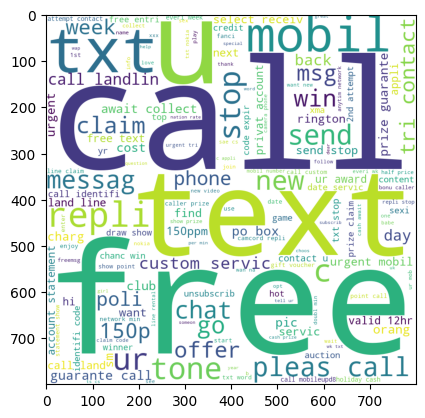

In [113]:
plt.imshow(spam_wc)

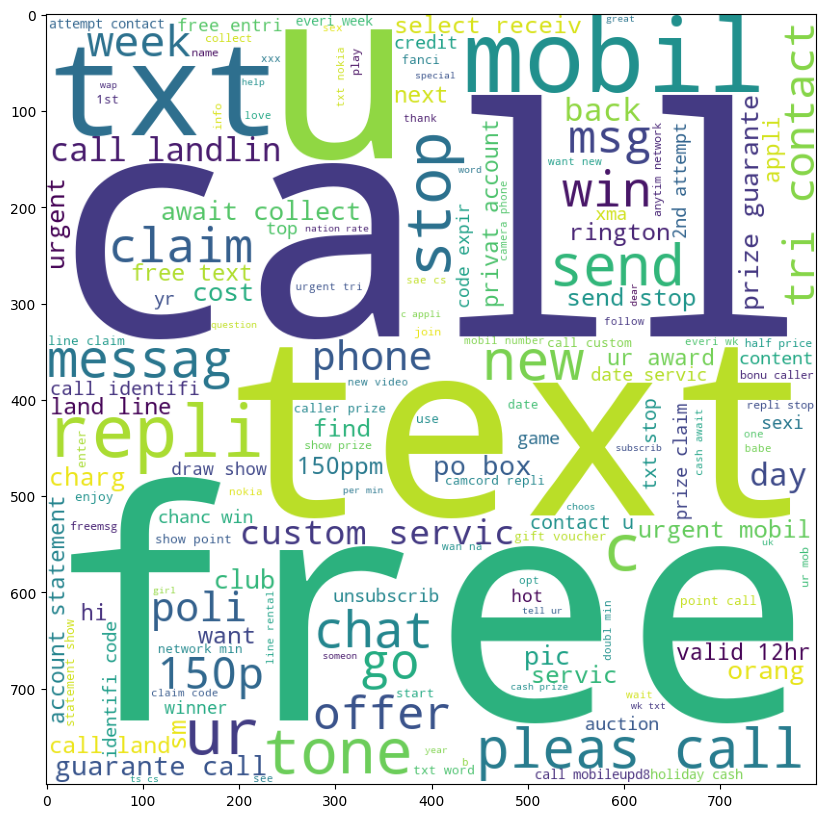

In [115]:
plt.figure(figsize=(18,10))
plt.imshow(spam_wc)

In [116]:
#for ham

ham_wc = wc.generate(df[df['Target']==0]['Transformed_Text'].str.cat(sep=" "))

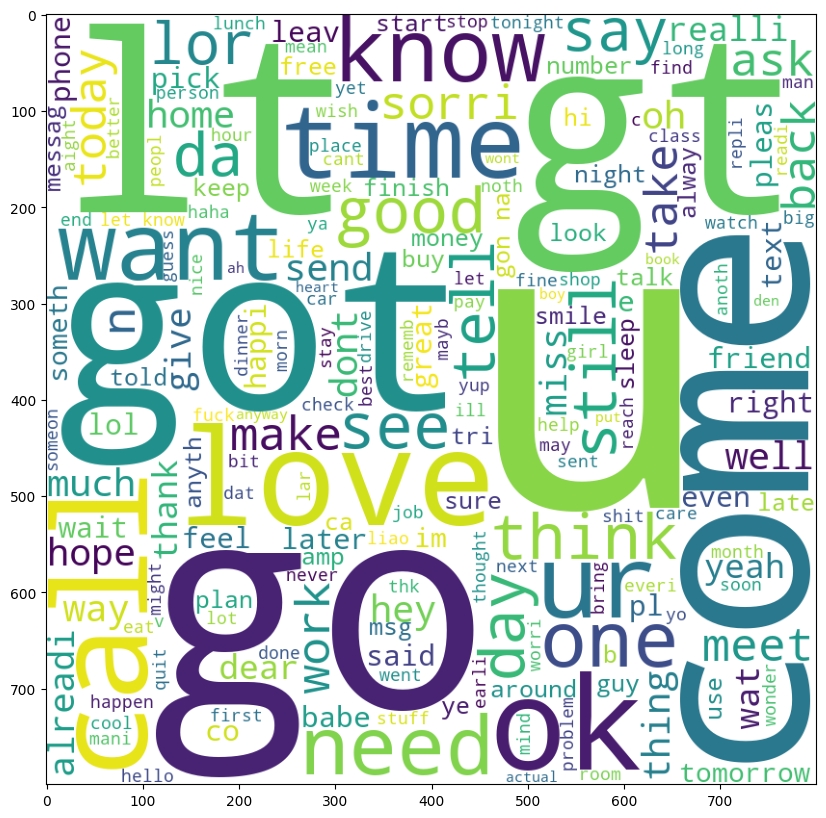

In [118]:
plt.figure(figsize=(18,10))
plt.imshow(ham_wc)

now lets see top 30 words used in spam and ham

In [119]:
df.head(5)

,Target,Text,num_charecters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [120]:
#top 30 words in spam
df[df['Target']==1]['Transformed_Text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transformed_Text, Length: 647, dtype: object

In [121]:
df[df['Target']==1]['Transformed_Text']

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [122]:
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [123]:
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
    print(msg.split())

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18']
['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour']
['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']
['six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'c

In [124]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [125]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [130]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 316,
         'free': 188,
         '2': 155,
         'txt': 140,
         'text': 122,
         'ur': 119,
         'u': 117,
         'mobil': 110,
         'stop': 104,
         'repli': 103,
         'claim': 97,
         '4': 97,
         'prize': 80,
         'get': 73,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 59,
         'urgent': 57,
         'nokia': 55,
         'award': 55,
         'contact': 54,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 46,
         'c': 45,
         'min': 45,
         'collect': 44,
         'messag': 42,
         'guarante': 41,
         'per': 41,
         'custom': 40,
         'chat': 37,
         'tri': 36,
         'msg': 35,
         'number': 35,
         'cs': 35,
         'draw': 34,
         'today': 33,
         'offer': 33,
         'line': 33,
         'show': 32,
         'go': 32,
         'want': 31,
         'receiv': 3

In [131]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 316),
 ('free', 188),
 ('2', 155),
 ('txt', 140),
 ('text', 122),
 ('ur', 119),
 ('u', 117),
 ('mobil', 110),
 ('stop', 104),
 ('repli', 103),
 ('claim', 97),
 ('4', 97),
 ('prize', 80),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 59),
 ('urgent', 57),
 ('nokia', 55),
 ('award', 55),
 ('contact', 54),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 46),
 ('c', 45),
 ('min', 45),
 ('collect', 44)]

In [132]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,316
1,free,188
2,2,155
3,txt,140
4,text,122
5,ur,119
6,u,117
7,mobil,110
8,stop,104
9,repli,103


C:\Users\HP\AppData\Local\Temp\ipykernel_936\1137217744.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=df_common_words, palette='viridis')


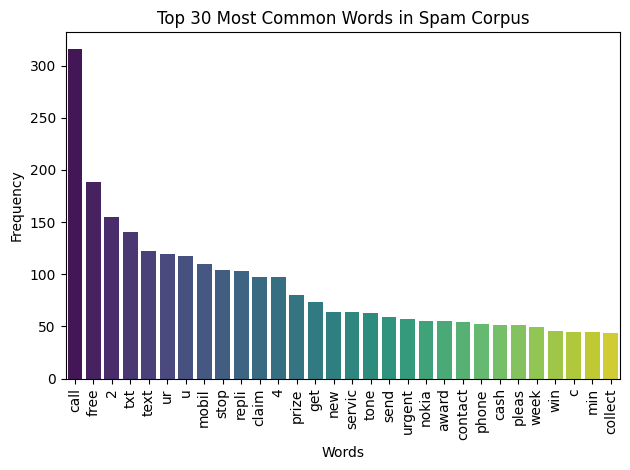

In [139]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming spam_corpus is a list of words or tokens
# Count occurrences and take the most common 30
common_words = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the most common words and their counts
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot using seaborn barplot
sns.barplot(x='Word', y='Count', data=df_common_words, palette='viridis')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.tight_layout()
plt.show()


In [142]:
#top 30 words from ham

ham_corpus=[]
for msg in df[df['Target']==0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [143]:
len(ham_corpus)

35306

In [145]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

C:\Users\HP\AppData\Local\Temp\ipykernel_936\416971284.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=df_common_words_ham, palette='viridis')


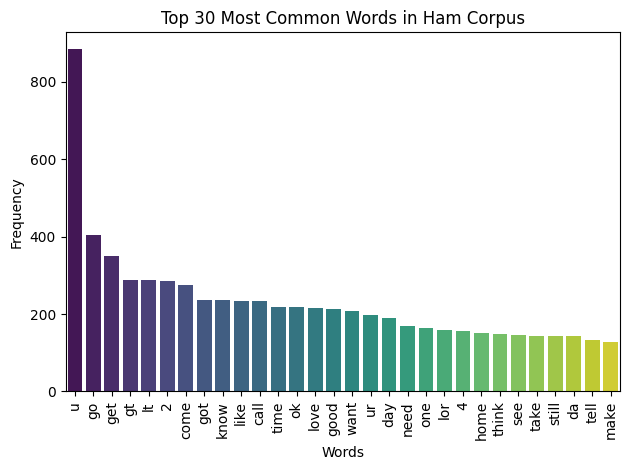

In [146]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list of words or tokens for non-spam messages
# Count occurrences and take the most common 30
common_words_ham = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the most common words and their counts
df_common_words_ham = pd.DataFrame(common_words_ham, columns=['Word', 'Count'])

# Plot using seaborn barplot
sns.barplot(x='Word', y='Count', data=df_common_words_ham, palette='viridis')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.tight_layout()
plt.show()


# Model Building


In [147]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [149]:
x = cv.fit_transform(df['Transformed_Text']).toarray()

In [150]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [151]:
x.shape

(5163, 6675)

In [152]:
y = df['Target'].values

In [153]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [157]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [158]:
gnb = GaussianNB()

In [159]:
mnb = MultinomialNB()

In [160]:
bnb = BernoulliNB()

In [164]:
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8664085188770572
[[787 125]
 [ 13 108]]
0.463519313304721


In [165]:
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9757986447241046
[[899  13]
 [ 12 109]]
0.8934426229508197


In [166]:
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9690222652468539
[[908   4]
 [ 28  93]]
0.9587628865979382


In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()


In [169]:
x_tfidf = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [170]:
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [171]:
x_tfidf.shape

(5163, 6675)